# Question 1

In [1]:
import pandas as pd
df = pd.read_csv('Downloads/Topic_Survey_Assignment.csv',index_col=0)

In [2]:
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
# sort the dataframe descending order of very interested
least_interested = df.sort_values(by=['Very interested'],ascending=False)
least_interested

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [4]:
#Convert the numbers into percentages of the total number of respondents.
#Recall that 2,233 respondents completed the survey.
#Round percentages to 2 decimal places.
least_interested = round(least_interested*100/2233,2)

In [5]:
least_interested

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


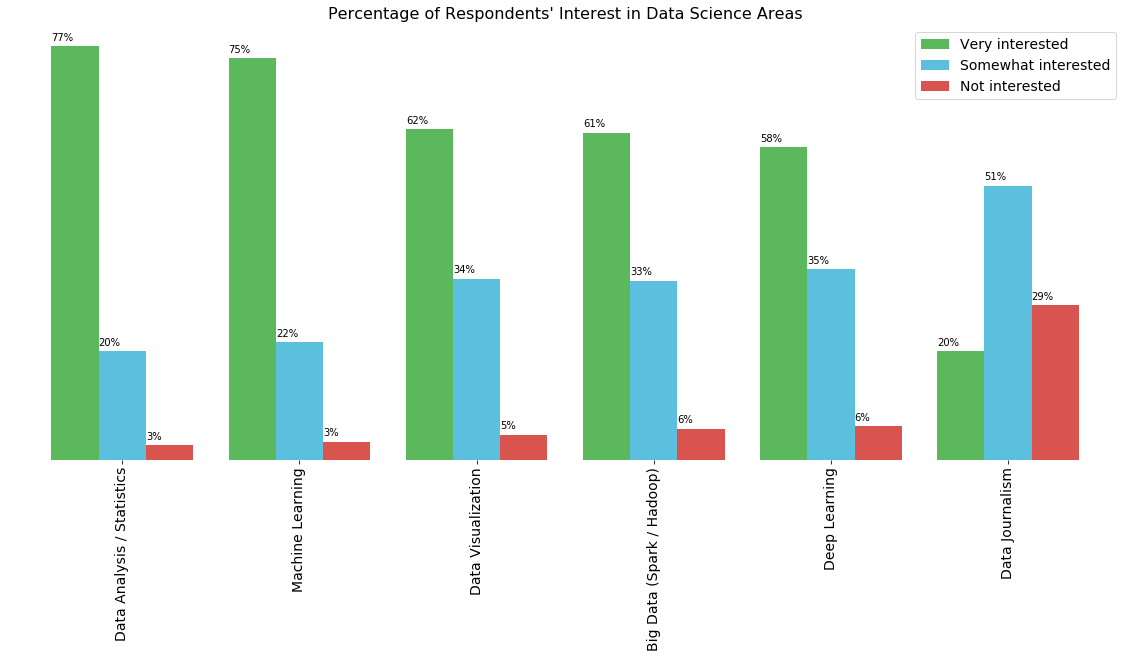

In [12]:
import matplotlib.pyplot as plt

# Instructions
# use a figure size of (20, 8),
# bar width of 0.8,
# use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
# use font size 14 for the bar labels, percentages, and legend,
# use font size 16 for the title, and,
# display the percentages above the bars as shown above, and remove the left, top, and right borders.

colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax = (least_interested.div(least_interested.sum(1), axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=least_interested.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
plt.show()

# Question 2

In [7]:
data = pd.read_csv('Downloads/Police_Department_Incidents_-_Previous_Year__2016_.csv') 
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [8]:
ddf = data['PdDistrict'].value_counts().to_frame()
ddf.reset_index(inplace=True)

In [9]:
ddf.columns=['Neighborhood','Count']
ddf

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [51]:
!pip install geojson

In [80]:
import geojson
with open('Downloads/Current Police Districts.geojson') as f:
     gj = geojson.load(f)

In [88]:
gj['features'][0]['properties']

{'shape_area': '91344142.1925',
 'shape_leng': '87550.2751419',
 'company': 'B',
 'shape_le_1': '100231.353916',
 'district': 'SOUTHERN'}

In [92]:
import folium

# it is centred around San Francisco,
latitude = 37.77
longitude = -122.42
sf_neighborhood_geo = 'Downloads/Current Police Districts.geojson'

# Create map
sf_map = folium.Map(
       location=[latitude,longitude],
       # you use a zoom level of 12,
       zoom_start=12)

bins = [8699, 12648, 16597, 20546, 24495, 28445]

# Use json file  TEST based on class
folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=ddf,
       columns=['Neighborhood','Count'],
       key_on='feature.properties.district',
    
       # you use fill_color = 'YlOrRd'
       fill_color='YlOrRd',
       #threshold_scale = bins,
       fill_opacity='0.7',
       line_opacity='0.2',
       legend_name='Crime Rate in San Francisco, by Neighborhood').add_to(sf_map)

# display the map
sf_map